In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

Matplotlib is building the font cache; this may take a moment.


In [2]:
model = ConcreteModel("Production Planning: Version 1")

In [3]:
model.display()

Model 'Production Planning: Version 1'

  Variables:
    None

  Objectives:
    None

  Constraints:
    None


In [4]:
model.x_M = Var(bounds = (0, None))
model.x_A = Var(bounds = (0, 80))
model.x_B = Var(bounds = (0, 100))

model.y_U = Var(bounds = (0, 40))
model.y_V = Var(bounds = (0, None))

In [5]:
model.display()

Model 'Production Planning: Version 1'

  Variables:
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    80 : False :  True :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :   100 : False :  True :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    40 : False :  True :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals

  Objectives:
    None

  Constraints:
    None


In [6]:
# Expressions
model.revenue = 270 * model.y_U + 210 * model.y_V
model.cost = 10 * model.x_M + 50 * model.x_A + 40 * model.x_B

# Expressions can be printed
print(model.revenue)
print(model.cost)

270*y_U + 210*y_V
10*x_M + 50*x_A + 40*x_B


In [7]:
@model.Objective(sense = maximize)
def profit(m):
    return m.revenue - m.cost

In [8]:
model.display()

Model 'Production Planning: Version 1'

  Variables:
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    80 : False :  True :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :   100 : False :  True :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    40 : False :  True :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals

  Objectives:
    profit : Size=1, Index=None, Active=True
ERROR: evaluating object as numeric value: y_U
        (object: <class 'pyomo.core.base.var.ScalarVar'>)
    No value for 

In [9]:
@model.Constraint()
def raw_materials(m):
    return 10 * m.y_U + 9 * m.y_V <= m.x_M

@model.Constraint()
def labor_A(m):
    return 1 * m.y_U + 1 * m.y_V <= m.x_A

@model.Constraint()
def labor_B(m):
    return 2 * m.y_U + 1 * m.y_V <= m.x_B

In [10]:
model.pprint()

5 Var Declarations
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    80 : False :  True :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :   100 : False :  True :  Reals
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    40 : False :  True :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 270*y_U + 210*y_V - (10*x_M + 50*x_A + 40*x_B)

3 Constraint Dec

In [11]:
from pyomo.contrib import appsi

In [12]:
SOLVER = appsi.solvers.Ipopt()
SOLVER.available()

<Availability.FullLicense: 1>

In [13]:
results = SOLVER.solve(model)

In [14]:
results.__dir__()

['solution_loader',
 'termination_condition',
 'best_feasible_objective',
 'best_objective_bound',
 '__module__',
 '__doc__',
 '__init__',
 '__str__',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [15]:
results.termination_condition

<TerminationCondition.optimal: 5>

In [16]:
appsi.base.TerminationCondition.optimal

<TerminationCondition.optimal: 5>

In [17]:
model.pprint()

5 Var Declarations
    x_A : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 80.00000079966169 :    80 : False : False :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 100.0000009993234 :   100 : False : False :  Reals
    x_M : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 740.000007476385 :  None : False : False :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 20.000000199623045 :    40 : False : False :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value           : Upper : Fixed : Stale : Domain
        None :     0 : 60.000000609942 :  None : False : False :  Reals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense

In [18]:
print(value(model.profit))
print(value(model.cost))
print(value(model.revenue))

2600.000027266171
15400.00015471987
18000.00018198604


In [19]:
print(model.x_A())
print(model.x_B())

80.00000079966169
100.0000009993234


In [20]:
import pandas as pd

# create pandas series for production and raw materials
production = pd.Series(
    {
        "U": value(model.y_U),
        "V": value(model.y_V),
    }
)

raw_materials = pd.Series(
    {
        "A": value(model.x_A),
        "B": value(model.x_B),
        "M": value(model.x_M),
    }
)

production


U    20.000000
V    60.000001
dtype: float64

In [21]:
raw_materials

A     80.000001
B    100.000001
M    740.000007
dtype: float64

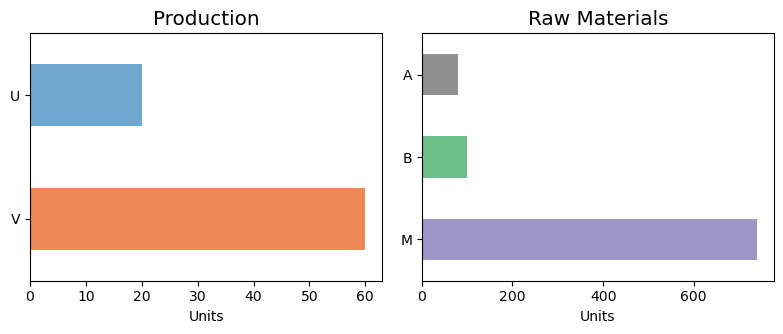

In [22]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots and configure global settings
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))
plt.rcParams["font.size"] = 12
colors = plt.cm.tab20c.colors
color_sets = [[colors[0], colors[4]], [colors[16], colors[8], colors[12]]]
datasets = [production, raw_materials]
titles = ["Production", "Raw Materials"]

# Plot data on subplots
for i, (data, title, color_set) in enumerate(zip(datasets, titles, color_sets)):
    data.plot(ax=ax[i], kind="barh", title=title, alpha=0.7, color=color_set)
    ax[i].set_xlabel("Units")
    ax[i].invert_yaxis()
plt.tight_layout()
plt.show()


### Data driven model

In [23]:
PRODUCTS = {"U", "V"}

prices = {"U": 270, "V": 210}
demands = {"U": 40, "V": None}



In [24]:
LABOR = {"A", "B"}
COST_LABOR = {"A": 50, "B": 40}
BOUND_LABOR = {"A": 80, "B": 100}

RAW_M = {"U": 10, "V": 9}
LABOR_REQUIRED = {
    "A": { "U": 1, "V": 1},
    "B": { "U": 2, "V": 1}
}

COST_RM = 10

In [25]:
list(dict.fromkeys(LABOR))

['A', 'B']

In [26]:
model = ConcreteModel("Production Optimization")

In [27]:
model.PRODUCTS = Set(initialize = list(PRODUCTS))
model.LABOR = Set(initialize = list(LABOR))

In [28]:
model.pprint()

2 Set Declarations
    LABOR : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'A', 'B'}
    PRODUCTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'V', 'U'}

2 Declarations: PRODUCTS LABOR


In [29]:
# parameter indexed on PRODUCTS
@model.Param(model.PRODUCTS, domain = Any)
def demand(model, product):
    return demands[product]

In [30]:
model.pprint()

2 Set Declarations
    LABOR : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'A', 'B'}
    PRODUCTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'V', 'U'}

1 Param Declarations
    demand : Size=2, Index=PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key : Value
          U :    40
          V :  None

3 Declarations: PRODUCTS LABOR demand


In [31]:
@model.Param(model.LABOR, domain = Any)
def bound_labor(model, l):
    return BOUND_LABOR[l]

@model.Param(model.PRODUCTS, domain = Any)
def raw_material(model, p):
    return RAW_M[p]

@model.Param()
def cost_rawmaterial(m):
    return COST_RM

In [32]:
model.pprint()

2 Set Declarations
    LABOR : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'A', 'B'}
    PRODUCTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'V', 'U'}

4 Param Declarations
    bound_labor : Size=2, Index=LABOR, Domain=Any, Default=None, Mutable=False
        Key : Value
          A :    80
          B :   100
    cost_rawmaterial : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :    10
    demand : Size=2, Index=PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key : Value
          U :    40
          V :  None
    raw_material : Size=2, Index=PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key : Value
          U :    10
          V :     9

6 Declarations: PRODUCTS LABOR demand bound_labor raw_material cost_rawmaterial


In [33]:
@model.Param(model.LABOR, model.PRODUCTS, domain = Any)
def labor(model, l, p):
    return LABOR_REQUIRED[l][p]

In [34]:
@model.Param(model.PRODUCTS, domain = Any)
def price(model, p):
    return prices[p]

In [35]:
@model.Param(model.LABOR, domain = Any)
def cost_labor(model, l):
    return COST_LABOR[l]

In [36]:
# DECISION VARIABLES

# production indexed on products
# bounds is a function which accepts two parameters, (model, product_index) and returns the bound for that product_index

model.production = Var(
    model.PRODUCTS, bounds = lambda model, product: (0, model.demand[product]) 
)

In [37]:
# hours indexed on labors

model.hours = Var(
    model.LABOR, bounds = lambda model, l: (0, model.bound_labor[l])
)

In [38]:
model.qty_rm = Var(bounds = (0, None))

###  Objective

In [39]:
@model.Objective(sense = maximize)
def profit(model):
    model.revenue = quicksum(model.production[p] * model.price[p] for p in model.PRODUCTS)
    model.cost = quicksum(model.cost_labor[l] * model.hours[l] for l in model.LABOR) + model.qty_rm * model.cost_rawmaterial
    
    return model.revenue - model.cost

### Constraints, apart from bounds

In [40]:
@model.Constraint()
def raw_material_constraint(model):
    return quicksum(model.raw_material[p] * model.production[p] for p in model.PRODUCTS) <= model.qty_rm

In [41]:
@model.Constraint(model.LABOR)
def limited_hours(model, l):
    return quicksum(model.labor[l, p] * model.production[p] for p in model.PRODUCTS) <= model.hours[l]

In [42]:
from pyomo.contrib import appsi
SOLVER = appsi.solvers.Ipopt()
SOLVER.available()

<Availability.FullLicense: 1>

In [43]:
results = SOLVER.solve(model)

In [44]:
value(model.profit)

2600.000027266171

In [45]:
value(model.revenue)

18000.00018198604

In [46]:
value(results.best_feasible_objective)

2600.000027266171